In [73]:
import numpy as np
import matplotlib.pyplot as plt

The function g(x, y) is defined as:

$$
g(x, y) = 
\begin{cases} 
\frac{2 V_e}{(R_c^2 - R_e^2)^3} \left( (x^2 + y^2) - R_e^2 \right)^3 - \frac{3 V_e}{(R_c^2 - R_e^2)^2} \left( (x^2 + y^2) - R_e^2 \right)^2 + V_e, & \text{if } R_e^2 \leq x^2 + y^2 \leq R_c^2, \\
0, & \text{otherwise}.
\end{cases}
$$


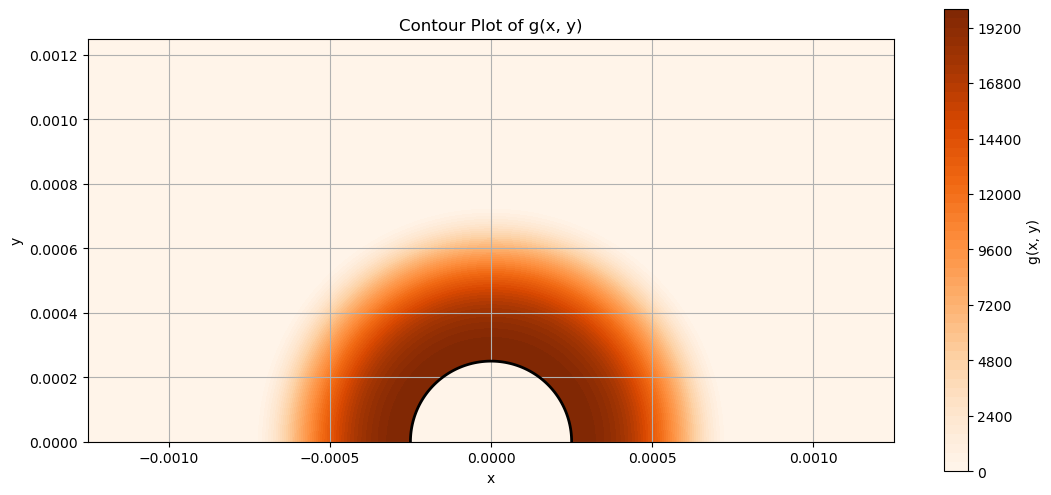

In [74]:
Re = 2.5e-4
Rc = 3.0*Re
Ve = 20000.
dR2 = Rc**2 - Re**2

def g(x,y):
    r2 = x**2 + y**2
    # Use element-wise operations
    mask = (r2 >= Re**2) & (r2 <= Rc**2)  # Create a boolean mask
    value = np.zeros_like(r2)  # Initialize value array with zeros
    value[mask] = 2.*Ve/(dR2**3)*((r2[mask]-Re**2)**3) - 3.*Ve/(dR2**2)*((r2[mask]-Re**2)**2) + Ve 
    return value

x=np.linspace(-5.*Re,5.*Re,1000)
y=np.linspace(0,5.0*Re,1000)
X,Y = np.meshgrid(x,y)
Z = g(X, Y)

plt.figure(figsize=(13, 6))
plt.contourf(X, Y, Z, levels=50, cmap='Oranges')
plt.colorbar(label='g(x, y)')
plt.title('Contour Plot of g(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()


# Overlay semicircle on plot
theta = np.linspace(0, np.pi, 100)  # Angles for semicircle
x_semi = Re * np.cos(theta)  # X coordinates
y_semi = Re * np.sin(theta)  # Y coordinates
plt.plot(x_semi, y_semi, color='black', linewidth=2, label='Semicircle (Re)')

plt.gca().set_aspect('equal')


plt.show()

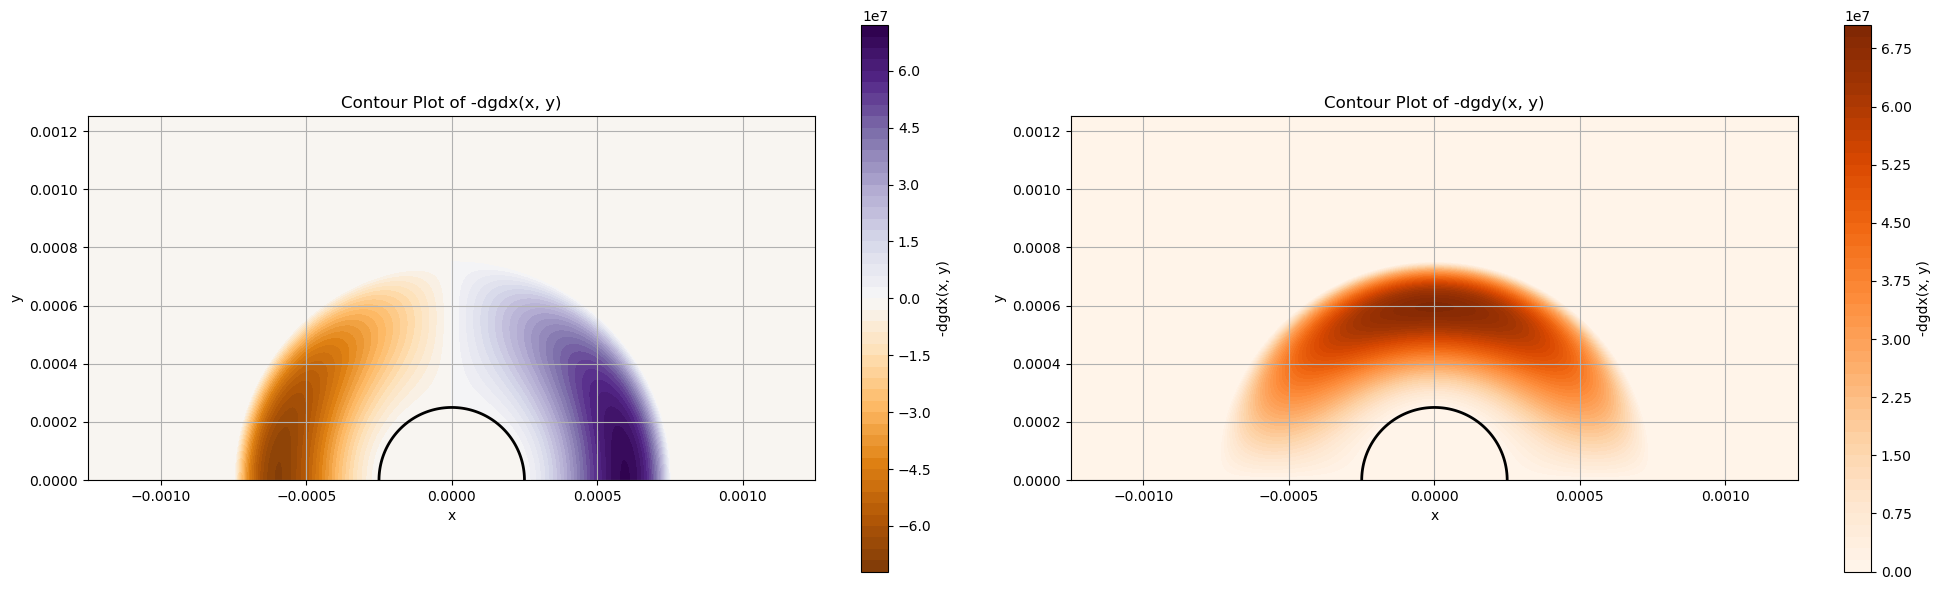

In [75]:
def minus_grad_g(x,y):
    r2 = x**2 + y**2
    # Use element-wise operations
    mask = (r2 >= Re**2) & (r2 <= Rc**2)  # Create a boolean mask
    value = np.array([np.zeros_like(r2),np.zeros_like(r2)])  # Initialize value array with zeros
    value[0,mask] = - ( 2.*Ve/(dR2**3)*3.*((r2[mask]-Re**2)**2)*2.*x[mask] - 3.*Ve/(dR2**2)*2.*(r2[mask]-Re**2)*2.*x[mask] )
    value[1,mask] = - ( 2.*Ve/(dR2**3)*3.*((r2[mask]-Re**2)**2)*2.*y[mask] - 3.*Ve/(dR2**2)*2.*(r2[mask]-Re**2)*2.*y[mask] )
    return value


x=np.linspace(-5.*Re,5.*Re,1000)
y=np.linspace(0,5.0*Re,1000)
X,Y = np.meshgrid(x,y)
ZG = minus_grad_g(X, Y)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# First contour plot
contour1 = axes[0].contourf(X, Y, ZG[0], levels=50, cmap='PuOr')
fig.colorbar(contour1, ax=axes[0], label='-dgdx(x, y)')
axes[0].set_title('Contour Plot of -dgdx(x, y)')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid()

# Second contour plot
contour2 = axes[1].contourf(X, Y, ZG[1], levels=50, cmap='Oranges')
fig.colorbar(contour2, ax=axes[1], label='-dgdx(x, y)')
axes[1].set_title('Contour Plot of -dgdy(x, y)')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].grid()

# Overlay semicircle on plots
theta = np.linspace(0, np.pi, 100)  # Angles for semicircle
x_semi = Re * np.cos(theta)  # X coordinates
y_semi = Re * np.sin(theta)  # Y coordinates
axes[0].plot(x_semi, y_semi, color='black', linewidth=2, label='Semicircle (Re)')
axes[1].plot(x_semi, y_semi, color='black', linewidth=2, label='Semicircle (Re)')

axes[0].set_aspect('equal')
axes[1].set_aspect('equal')

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

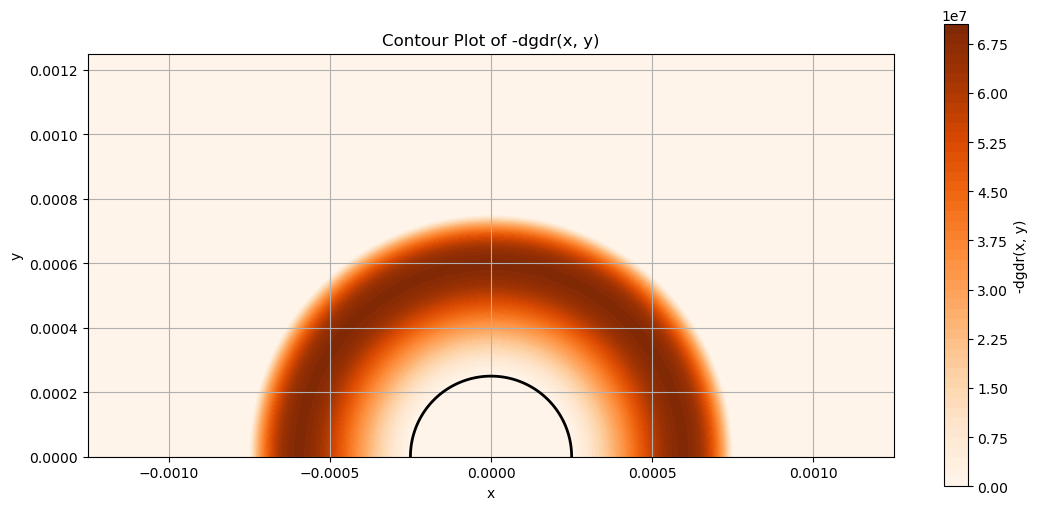

In [76]:

def minus_dgdr(x,y):
    r2 = x**2 + y**2
    r = np.sqrt(r2)
    # Use element-wise operations
    mask = (r2 >= Re**2) & (r2 <= Rc**2)  # Create a boolean mask
    value = np.zeros_like(r2)  # Initialize value array with zeros
    value[mask] = - ( 2.*Ve/(dR2**3)*3.*((r2[mask]-Re**2)**2)*2.*r[mask] - 3.*Ve/(dR2**2)*2.*(r2[mask]-Re**2)*2.*r[mask] )
    return value

x=np.linspace(-5.*Re,5.*Re,1000)
y=np.linspace(0,5.0*Re,1000)
X,Y = np.meshgrid(x,y)
Z_dgdr = minus_dgdr(X, Y)

plt.figure(figsize=(13, 6))
plt.contourf(X, Y, Z_dgdr, levels=50, cmap='Oranges')
plt.colorbar(label='-dgdr(x, y)')
plt.title('Contour Plot of -dgdr(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()


# Overlay semicircle on plot
theta = np.linspace(0, np.pi, 100)  # Angles for semicircle
x_semi = Re * np.cos(theta)  # X coordinates
y_semi = Re * np.sin(theta)  # Y coordinates
plt.plot(x_semi, y_semi, color='black', linewidth=2, label='Semicircle (Re)')

plt.gca().set_aspect('equal')


plt.show()

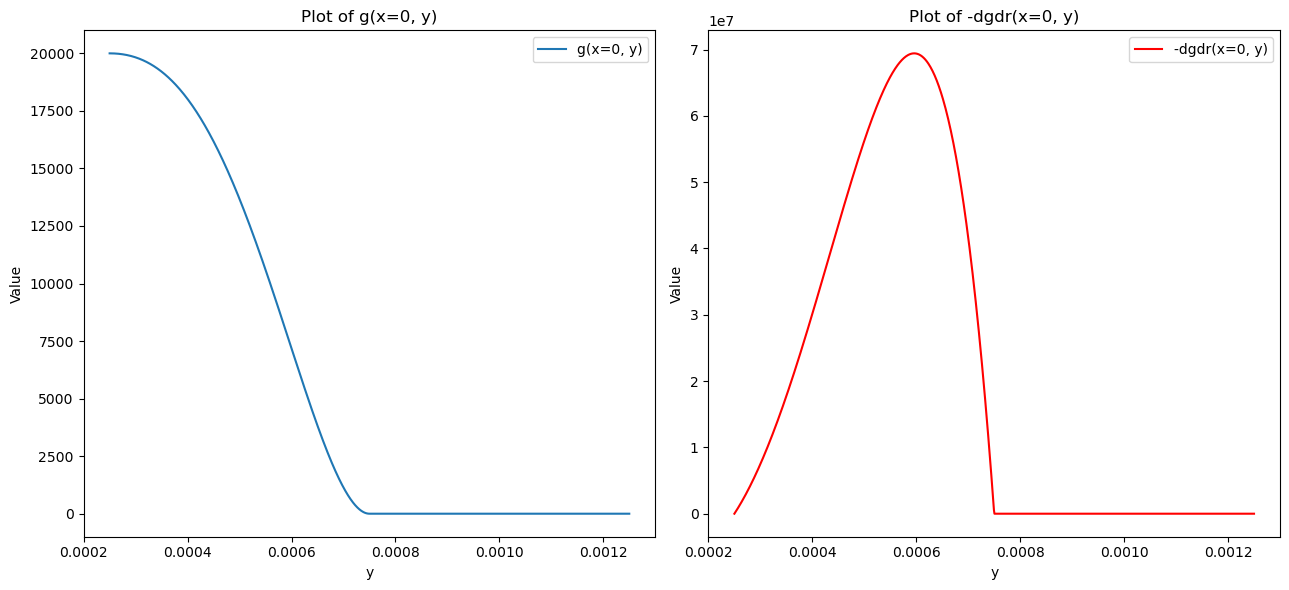

In [82]:
# Let's plot g and -dgdr on the vertical line

y = np.linspace(Re, 5.0*Re, 1000)
x = np.zeros_like(y)
g_values = g(x, y)
dgdr_values = minus_dgdr(x, y)

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))

# First plot: g(x=0, y)
ax1.plot(y, g_values, label='g(x=0, y)')
ax1.set_xlabel('y')
ax1.set_ylabel('Value')
ax1.set_title('Plot of g(x=0, y)')
ax1.legend()

# Second plot: -dgdr(x=0, y)
ax2.plot(y, dgdr_values,color='red', label='-dgdr(x=0, y)')
ax2.set_xlabel('y')
ax2.set_ylabel('Value')
ax2.set_title('Plot of -dgdr(x=0, y)')
ax2.legend()

# Display the plots
plt.tight_layout()
plt.show()
